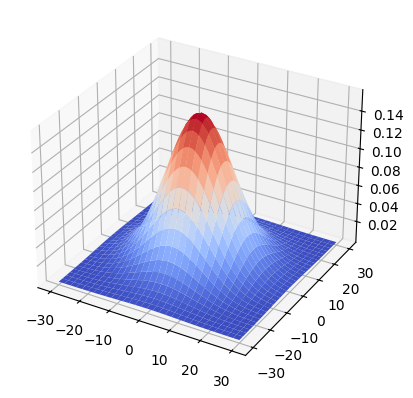

In [1]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 10
hw = 3*sigma
x = np.linspace(-hw, hw, 2*hw+1)
y = np.linspace(-hw, hw, 2*hw+1)

X, Y = np.meshgrid(x, y)

G = 1/(2*np.pi) * np.exp(-(X**2 + Y**2)/(2*sigma**2))

# Plot in 3-D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, G, cmap='coolwarm')
plt.show()